In [1]:
# Data Source
!wget --header="Host: doc-0g-70-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_quvsv3f7hvua6si0jcsst9neqmqcnn8o_nonce=2ag65phl8df8i" --header="Connection: keep-alive" "https://doc-0g-70-docs.googleusercontent.com/docs/securesc/r5kf5b7cdb9m7vvltocpefcjv36j9hqe/758li00ih13112n0qpcao36uev87h340/1621846800000/04779880292502345341/04779880292502345341/1kPeuVQAwbM1x7DTZEtyrGXITN3vcFbwV?e=download&authuser=0&nonce=2ag65phl8df8i&user=04779880292502345341&hash=da2fsgoucqvt8q5e67ajomaibjif8opp" -c -O 'root2ai - Data.csv'

--2021-05-24 09:01:36--  https://doc-0g-70-docs.googleusercontent.com/docs/securesc/r5kf5b7cdb9m7vvltocpefcjv36j9hqe/758li00ih13112n0qpcao36uev87h340/1621846800000/04779880292502345341/04779880292502345341/1kPeuVQAwbM1x7DTZEtyrGXITN3vcFbwV?e=download&authuser=0&nonce=2ag65phl8df8i&user=04779880292502345341&hash=da2fsgoucqvt8q5e67ajomaibjif8opp
Resolving doc-0g-70-docs.googleusercontent.com (doc-0g-70-docs.googleusercontent.com)... 172.217.9.193, 2607:f8b0:4004:806::2001
Connecting to doc-0g-70-docs.googleusercontent.com (doc-0g-70-docs.googleusercontent.com)|172.217.9.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1900817 (1.8M) [text/csv]
Saving to: ‘root2ai - Data.csv’

root2ai - Data.csv  100%[===================>]   1.81M  --.-KB/s    in 0.06s   

2021-05-24 09:01:37 (31.2 MB/s) - ‘root2ai - Data.csv’ saved [1900817/1900817]



In [2]:
# Glove Vectors
!wget --header="Host: doc-08-70-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_quvsv3f7hvua6si0jcsst9neqmqcnn8o=04779880292502345341|1621846800000|upk02hl5bbuhp08f2u4csn3rburts87g" --header="Connection: keep-alive" "https://doc-08-70-docs.googleusercontent.com/docs/securesc/r5kf5b7cdb9m7vvltocpefcjv36j9hqe/na437ekioh3afeoneiuta0cv81obk6ga/1621846875000/04779880292502345341/04779880292502345341/1CUIIy_uPGv3JFPKR_D0wNOBu_H-V5GbP?e=download&authuser=0" -c -O 'glove_vectors'

--2021-05-24 09:01:48--  https://doc-08-70-docs.googleusercontent.com/docs/securesc/r5kf5b7cdb9m7vvltocpefcjv36j9hqe/na437ekioh3afeoneiuta0cv81obk6ga/1621846875000/04779880292502345341/04779880292502345341/1CUIIy_uPGv3JFPKR_D0wNOBu_H-V5GbP?e=download&authuser=0
Resolving doc-08-70-docs.googleusercontent.com (doc-08-70-docs.googleusercontent.com)... 172.217.9.193, 2607:f8b0:4004:806::2001
Connecting to doc-08-70-docs.googleusercontent.com (doc-08-70-docs.googleusercontent.com)|172.217.9.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘glove_vectors’

glove_vectors           [           <=>      ] 121.60M  41.9MB/s    in 2.9s    

2021-05-24 09:01:51 (41.9 MB/s) - ‘glove_vectors’ saved [127506004]



In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Embedding, Dense, LSTM
from tensorflow.keras import Model
import tensorflow as tf

*Reading the data*

In [2]:
df = pd.read_csv('root2ai - Data.csv')
df.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


In [3]:
df['Target'].unique()

array(['Blockchain', 'Bigdata', 'credit reporting', 'Cyber Security',
       'FinTech', 'Microservices', 'Neobanks', 'Robo Advising',
       'Stock Trading', 'Data Security', 'Reg Tech'], dtype=object)

In [4]:
df['Target'].value_counts()

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        977
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

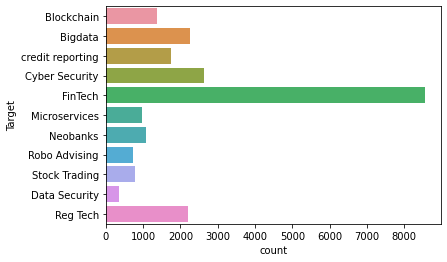

In [5]:
sns.countplot(y = df['Target'])
plt.show()

*General text preprocessing*

In [6]:
def preprocess(x):
    x1 = str(x)
    x1 = re.sub('\r', ' ', x1)
    x1 = re.sub('\n', ' ', x1)
    x1 = re.sub('@', ' ', x1)
    x1 = re.sub('\t', ' ', x1)
    x1 = re.sub('\!', ' ', x1)
    x1 = re.sub('\$', ' ', x1)
    x1 = re.sub('\%', ' ', x1)
    x1 = re.sub('\&', ' ', x1)
    x1 = re.sub(r'<.*>', ' ', x1)
    x1 = re.sub(r'>', ' ', x1)
    x1 = re.sub(r'<', ' ', x1)
    x1 = re.sub(r'\.', ' ', x1)
    x1 = re.sub(r"won't", "will not", x1)
    x1 = re.sub(r"can\'t", "can not", x1)
    x1 = re.sub(r"n\'t", " not", x1)
    x1 = re.sub(r"\'re", " are", x1)
    x1 = re.sub(r"\'s", " is", x1)
    x1 = re.sub(r"\'d", " would", x1)
    x1 = re.sub(r"\'ll", " will", x1)
    x1 = re.sub(r"\'t", " not", x1)
    x1 = re.sub(r"\'ve", " have", x1)
    x1 = re.sub(r"\'m", " am", x1)
    x1 = x1.strip()
    return x1

In [7]:
df['Text'] = df['Text'].apply(preprocess)

*Splitting the data*

In [8]:
df_train, df_test = train_test_split(df, test_size = 0.15, random_state = 0, stratify = df['Target'])

X_train = df_train['Text']
y_train = df_train['Target']

X_test = df_test['Text']
y_test = df_test['Target']

In [9]:
import pickle

with open('glove_vectors', 'rb') as f:
    glove = pickle.load(f)
    glove_words =  set(glove.keys())

## ***Classical Machine Learning***

In [10]:
def avg_embedding(x):
    tokens = x.split()
    arr = np.zeros(300)
    for i in tokens:
        if i in glove_words:
            arr += glove[i]
    return arr/(len(tokens) + 1)

In [11]:
embedding_train = X_train.apply(avg_embedding)
embedding_train_matrix = np.zeros((len(X_train), 300))
for i in range(len(X_train)):
    embedding_train_matrix[i] = embedding_train.values[i]

embedding_test = X_test.apply(avg_embedding)
embedding_test_matrix = np.zeros((len(X_test), 300))
for i in range(len(X_test)):
    embedding_test_matrix[i] = embedding_test.values[i]

*1. Decision Tree Classifier*

In [12]:
dtc = DecisionTreeClassifier()
parameters = {'max_depth':  [1, 5, 10, 50],
              'min_samples_split': [5, 10, 100, 500]}
clf = RandomizedSearchCV(estimator = dtc, param_distributions = parameters, cv = 3, scoring = 'accuracy', return_train_score = True)
clf.fit(embedding_train_matrix, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [13]:
clf.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [14]:
print(accuracy_score(y_train, clf.predict(embedding_train_matrix)))
print(accuracy_score(y_test, clf.predict(embedding_test_matrix)))

0.46647320965903205
0.44509688784497947


In [15]:
print(f1_score(y_train, clf.predict(embedding_train_matrix), average = 'micro'))
print(f1_score(y_test, clf.predict(embedding_test_matrix), average = 'micro'))

0.46647320965903205
0.44509688784497947


In [16]:
accuracy_dtc_train = accuracy_score(y_train, clf.predict(embedding_train_matrix))
accuracy_dtc = accuracy_score(y_test, clf.predict(embedding_test_matrix))

*Since train and test scores are very similar therefore the model hasn't overfitted.*

*2. Logistic Regression*

In [17]:
model = LogisticRegression(random_state = 0)
parameters = {'C':  [0.00001, 0.001, 0.1, 1, 10, 100]}
clf = RandomizedSearchCV(estimator = model, param_distributions = parameters, cv = 3, scoring = 'accuracy', return_train_score = True)
clf.fit(embedding_train_matrix, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=0,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1e-05, 0.001, 0.1, 1, 10, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='accuracy', verbose=0)

In [18]:
clf.best_params_

{'C': 1}

In [19]:
print(accuracy_score(y_train, clf.predict(embedding_train_matrix)))
print(accuracy_score(y_test, clf.predict(embedding_test_matrix)))

0.611565965385014
0.5901350557839108


In [20]:
print(f1_score(y_train, clf.predict(embedding_train_matrix), average = 'micro'))
print(f1_score(y_test, clf.predict(embedding_test_matrix), average = 'micro'))

0.611565965385014
0.5901350557839108


In [21]:
accuracy_lr_train = accuracy_score(y_train, clf.predict(embedding_train_matrix))
accuracy_lr = accuracy_score(y_test, clf.predict(embedding_test_matrix))

*Here too the model isn't overfitting plus the accuracy score improves significantly.*

## ***Deep Learning methods***

*LSTM Model*

In [22]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
y_train = np_utils.to_categorical(y_train, len(df_train['Target'].unique()))
y_test = np_utils.to_categorical(y_test, len(df_train['Target'].unique()))

In [23]:
for i in range(10, 110, 10):
    print(np.percentile(X_train.apply(lambda x : len(x.split())), i))

2.0
4.0
5.0
7.0
8.0
9.0
11.0
13.0
16.0
113.0


In [24]:
for i in range(91, 101):
    print(np.percentile(X_train.apply(lambda x : len(x.split())), i))

17.0
17.0
18.0
19.0
20.0
21.0
23.0
25.0
30.0
113.0


In [25]:
X_train.head()

13135    hand people demise cash spurred buzz around apple
4761                 alternative data transforming finance
286      institute development research banking technol...
1271     recent report also central grid driven largely...
5369     general accounting office common broadly fall ...
Name: Text, dtype: object

In [26]:
X_test.head()

5171     however china adopted consolidated regulatory ...
21279    example technologies made possible payments pr...
21953    These expense revenue factors driving developm...
12545    sector long badly field innovation banking ins...
3279                                          newscientist
Name: Text, dtype: object

In [27]:
# For converting words into numbers
tokenizer = Tokenizer(num_words = 8000, filters = '!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(X_train)
X_train_new = tokenizer.texts_to_sequences(X_train.values)
X_test_new = tokenizer.texts_to_sequences(X_test.values)

In [28]:
max_text_length = 25
X_train_new = sequence.pad_sequences(X_train_new, maxlen = max_text_length, padding = 'post')
X_test_new = sequence.pad_sequences(X_test_new, maxlen = max_text_length, padding = 'post')

In [29]:
maximum_words = len(tokenizer.word_index)
embedding_matrix = np.zeros((maximum_words + 1, 300))

for word, i in tokenizer.word_index.items():
    if word in glove_words:
        embedding_matrix[i] = glove[word]

In [30]:
input = keras.layers.Input(shape = (max_text_length, ))
X = Embedding(output_dim = 300, input_dim = maximum_words + 1, input_length = max_text_length, weights = [embedding_matrix])(input)
lstm = LSTM(100, activation = 'relu', return_sequences = True, kernel_initializer = 'he_normal')(X)
lstm = Flatten()(lstm)
b1 = BatchNormalization()(lstm)
layer1 = Dense(128, activation = 'relu', kernel_initializer = 'he_normal')(b1)
b2 = BatchNormalization()(layer1)
dropout1 = Dropout(0.15)(layer1)
layer2 = Dense(64, activation = 'relu', kernel_initializer = 'he_normal')(dropout1)
b3 = BatchNormalization()(layer2)
dropout2 = Dropout(0.15)(layer2)
layer3 = Dense(32, activation = 'relu', kernel_initializer = 'he_normal')(dropout2)
b4 = BatchNormalization()(layer3)
layer4 = Dense(16, activation = 'relu', kernel_initializer = 'he_normal')(b2)
output = Dense(len(df_train['Target'].unique()), activation = 'softmax', name = 'output')(layer4)

In [31]:
model = Model(inputs = input, outputs = output)

In [32]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 25, 300)           3216900   
_________________________________________________________________
lstm (LSTM)                  (None, 25, 100)           160400    
_________________________________________________________________
flatten (Flatten)            (None, 2500)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2500)              10000     
_________________________________________________________________
dense (Dense)                (None, 128)               320128    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512   

In [33]:
epoch_no = 6
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(0.001), metrics = ['accuracy'])
model_history = model.fit(X_train_new, y_train, 
                          batch_size = 100, 
                          epochs = epoch_no, 
                          verbose = 1, 
                          validation_data = (X_test_new, y_test))

Epoch 1/6
193/193 [==============================] - 27s 131ms/step - loss: 1.8876 - accuracy: 0.4122 - val_loss: 1.6679 - val_accuracy: 0.5294
Epoch 2/6
193/193 [==============================] - 24s 126ms/step - loss: 1.0637 - accuracy: 0.6706 - val_loss: 1.2410 - val_accuracy: 0.6418
Epoch 3/6
193/193 [==============================] - 24s 126ms/step - loss: 0.7057 - accuracy: 0.7793 - val_loss: 1.0904 - val_accuracy: 0.6585
Epoch 4/6
193/193 [==============================] - 24s 126ms/step - loss: 0.5042 - accuracy: 0.8419 - val_loss: 1.1933 - val_accuracy: 0.6541
Epoch 5/6
193/193 [==============================] - 24s 126ms/step - loss: 0.3526 - accuracy: 0.8918 - val_loss: 1.3638 - val_accuracy: 0.6597
Epoch 6/6
193/193 [==============================] - 24s 126ms/step - loss: 0.2433 - accuracy: 0.9256 - val_loss: 1.5321 - val_accuracy: 0.6477


*At second epoch the difference between the train and validation accuracy is minimum which implies at this point the model has generalized well. After that it just starts overfitting.*

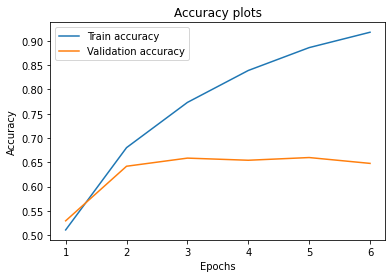

In [36]:
plt.title('Accuracy plots') 
plt.plot(list(range(1, epoch_no + 1)), model_history.history['accuracy'])
plt.plot(list(range(1, epoch_no + 1)), model_history.history['val_accuracy'])
plt.legend(['Train accuracy', 'Validation accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [37]:
results = pd.DataFrame({'Model': ['Decision Tree', 'Logistic Regression', 'LSTM Model'], 'Train Accuracy' : [accuracy_dtc_train, accuracy_lr_train, 0.6706], 'Test Accuracy' : [accuracy_dtc, accuracy_lr, 0.6418]})
results

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.466473,0.445097
1,Logistic Regression,0.611566,0.590135
2,LSTM Model,0.670600,0.641800


*Performance wise:*


> *LSTM > Logistic Regression > Decision Tree*


